In [58]:
from pdf2image import convert_from_path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils



In [59]:
pdf_pages = convert_from_path("pdfs/Consulting agreement.pdf")
page_count = len(pdf_pages)
pdf_images = []
print(page_count)

for page in pdf_pages:
    pdf_images.append(np.array(page))

4


Load in template and change it to a grayscale

The code below currently misses correctly identifying the template. Likely die to a scale miss match.

In [60]:
template = cv2.imread("templates/lotus.png")

template_gray = cv2.cvtColor(template, cv2.COLOR_BGRA2GRAY)

(tH, tW) = template_gray.shape[:2]



loop through each of the pdf pages and look for the template

In [61]:

found = None
page_count = 1

template_results = []

for page in pdf_images:
    gray_page = cv2.cvtColor(page, cv2.COLOR_BGRA2GRAY)

    for scale in np.linspace(0.2, 1.0, 20)[::-1]:  # start from 100% of the original size of the image and work our way down to 20% of the original size in 20 equally sized percent chunks
        resized_im = imutils.resize(gray_page, width = int(gray_page.shape[1] * scale))
        resizing_ratio = gray_page.shape[1] / float(resized_im.shape[1])  # ratio of the resizing

        if resized_im.shape[0] < tH or resized_im.shape[1] < tW:  # break if smaller than template
            break

        result = cv2.matchTemplate(resized_im, template_gray, cv2.TM_CCOEFF_NORMED)
        # max val is what I need to use as a threshold to see if correct id
        # (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)

        (minVal, maxVal, minLoc, maxLoc)  = cv2.minMaxLoc(result)

        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, resizing_ratio)

    template_results.append([page_count, found])
    found = None
    page_count += 1



In [62]:
(_, maxLoc, resizing_ratio) = found = template_results[0][1]
(startX, startY) = (int(maxLoc[0] * resizing_ratio), int(maxLoc[1] * resizing_ratio))
(endX, endY) = (int((maxLoc[0] + tW) * resizing_ratio), int((maxLoc[1] + tH) * resizing_ratio))



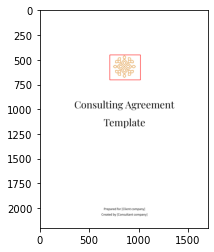

In [63]:
cv2.rectangle(pdf_images[0], (startX, startY), (endX, endY), (255, 0, 0), 3);
plt.imshow(pdf_images[0])

In [64]:
template_results
# cv2.imshow("im", pdf_images[1])
# cv2.imshow("Template", template)
# cv2.waitKey(0)

[[1, (0.9739762544631958, (318, 205), 2.210663198959688)],
 [2, (0.22688105702400208, (436, 944), 1.2031139419674453)],
 [3, (0.3514955937862396, (101, 1907), 1.0)],
 [4, (0.2377021312713623, (281, 313), 1.0925449871465296)]]